### Data 620 | Project 3

#### Team 3: Scott Karr, Omar Pineda Jr., Vikas Sinha, Aryeh Sturm, Antonio Bayquen

https://www.nltk.org/book/ch06.html

#### This work is a recitation of the gender classification exercise in Chapter 6 of Natural Language Processing with Python along with revisions to the gender features extractor which improve performance on the test set to 82.4%.


# Requirements:
Project 3 - This is a Team Project!
<center>------------------------------------------------------------------------------------------- o ----------------------------------------------------------------------------------------</center>
For this project, please work with the entire class as one collaborative group! Your project should be submitted (as a Jupyter Notebook via GitHub) by end of the due date. The group should present their code and findings in our meetup.

The ability to be an effective member of a virtual team is highly valued in the data science job market.
<center>------------------------------------------------------------------------------------------- o ----------------------------------------------------------------------------------------</center>


Using any of the three classifiers described in chapter 6 of Natural Language Processing with Python, and any features you can think of, build the best name gender classifier you can.

Begin by splitting the Names Corpus into three subsets: 

        (1) 500 words for the test set
        (2) 500 words for the dev- test set, and 
        (3) the remaining 6900 words for the training set 
        
Then, starting with the example name gender classifier, make incremental improvements. Use the dev-test set to check your progress. Once you are satisfied with your classifier, check its final performance on the test set.

How does the performance on the test set compare to the performance on the dev-test set? Is this what you'd expect?
Source: Natural Language Processing with Python, exercise 6.10.2.

# <center>6. Learning to Classify Text</center>

Detecting patterns is a central part of Natural Language Processing. Words ending in "-ed" tend to be past tense verbs (5.). Frequent use of "will" is indicative of news text (3). These observable patterns — word structure and word frequency — happen to correlate with particular aspects of meaning, such as tense and topic. But how did we know where to start looking, which aspects of form to associate with which aspects of meaning?

The goal of this chapter is to answer the following questions:

    (1) How can we identify particular features of language data that are salient for classifying it?
    (2) How can we construct models of language that can perform language processing tasks automatically?
    (3) What can we learn about language from these models?

Along the way we will study some important machine learning techniques, including decision trees, naive Bayes' classifiers, and maximum entropy classifiers. We will gloss over the mathematical and statistical underpinnings of these techniques, focusing instead on how and when to use them (see the Further Readings section for more technical background). Before looking at these methods, we first need to appreciate the broad scope of this topic.

# 1   Supervised Classification
Classification is the task of choosing the correct class label for a given input. In basic classification tasks, each input is considered in isolation from all other inputs, and the set of labels is defined in advance. Some examples of classification tasks are:

Deciding whether an email is spam or not.
Deciding what the topic of a news article is, from a fixed list of topic areas such as "sports," "technology," and "politics."
Deciding whether a given occurrence of the word bank is used to refer to a river bank, a financial institution, the act of tilting to the side, or the act of depositing something in a financial institution.
The basic classification task has a number of interesting variants. For example, in multi-class classification, each instance may be assigned multiple labels; in open-class classification, the set of labels is not defined in advance; and in sequence classification, a list of inputs are jointly classified.

A classifier is called supervised if it is built based on training corpora containing the correct label for each input. The framework used by supervised classification is shown in 1.1.

![supervised-classification.png](https://raw.githubusercontent.com/vsinha-cuny/data620Proj3/master/supervised-classification.png)

Figure 1.1: Supervised Classification. 

    (a) During training, a feature extractor is used to convert each input value to a feature set. These 
        feature sets, which capture the basic information about each input that should be used to classify it,  
        are discussed in the next section. Pairs of feature sets and labels are fed into the machine learning        
        algorithm to generate a model. 

    (b) During prediction, the same feature extractor is used to convert unseen inputs to feature sets. These 
        feature sets are then fed into the model, which generates predicted labels.

In the rest of this section, we will look at how classifiers can be employed to solve a wide variety of tasks. Our discussion is not intended to be comprehensive, but to give a representative sample of tasks that can be performed with the help of text classifiers.

# 1.1   Gender Identification

Male and female names have some distinctive characteristics. Names ending in a, e and i are likely to be female, while names ending in k, o, r, s and t are likely to be male. Let's build a classifier to model these differences more precisely.

The first step in creating a classifier is deciding what features of the input are relevant, and how to encode those features. For this example, we'll start by just looking at the final letter of a given name. The following feature extractor function builds a dictionary containing relevant information about a given name:

In [58]:
import nltk
import random
import numpy as np

#nltk.download('names')
from nltk.corpus import names

In [59]:
def gender_features(name):
    name=name.upper()
    return {
        'last_letter': name[-1]
    }

In [60]:
gender_features('Shrek')

{'last_letter': 'K'}

Now that we've defined a feature extractor, we need to prepare a list of examples and corresponding class labels.

In [61]:
# get list of ordered names from nltk.corpus by importing names
labeled_names = (
                    [(name, 'male') for name in names.words('male.txt')] +
                    [(name, 'female') for name in names.words('female.txt')]
)

random.seed(222)
# randomized the name orders
random.shuffle(labeled_names)
print(len(labeled_names))

7944


Next, we use the feature extractor to process the names data, and divide the resulting list of feature sets into a training set and a test set. The training set is used to train a new "naive Bayes" classifier.

In [62]:
# featuresets, train_set & test_set are dictionaries containing 2 elements per record, 
#  - the gender function return value &
#  - the actual gender from the labeled_names set that was imported
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]

#  apply Naive Bayes guess to train set and check classifier's predictions
classifier = nltk.NaiveBayesClassifier.train(train_set)

We will learn more about the naive Bayes classifier later in the chapter. For now, let's just test it out on some names that did not appear in its training data:

In [63]:
# use trained classifier to predict 2 names gender based upon last character
print('Neo is: ' + classifier.classify(gender_features('Neo')))
print('Trinity is: ' + classifier.classify(gender_features('Trinity')))

Neo is: male
Trinity is: female


Observe that these character names from The Matrix are correctly classified. Although this science fiction movie is set in 2199, it still conforms with our expectations about names and genders. We can systematically evaluate the classifier on a much larger quantity of unseen data:



In [64]:
print(nltk.classify.accuracy(classifier, test_set))

0.75


Finally, we can examine the classifier to determine which features it found most effective for distinguishing the names' genders:

In [65]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'A'            female : male   =     38.3 : 1.0
             last_letter = 'K'              male : female =     32.0 : 1.0
             last_letter = 'F'              male : female =     25.6 : 1.0
             last_letter = 'V'              male : female =     11.3 : 1.0
             last_letter = 'P'              male : female =     11.3 : 1.0


This listing shows that the names in the training set that end in "a" are female 33 times more often than they are male, but names that end in "k" are male 32 times more often than they are female. These ratios are known as likelihood ratios, and can be useful for comparing different feature-outcome relationships.

When working with large corpora, constructing a single list that contains the features of every instance can use up a large amount of memory. In these cases, use the function nltk.classify.apply_features, which returns an object that acts like a list but does not store all the feature sets in memory:

In [66]:
from nltk.classify import apply_features
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

Typically, feature extractors are built through a process of trial-and-error, guided by intuitions about what information is relevant to the problem. It's common to start with a "kitchen sink" approach, including all the features that you can think of, and then checking to see which features actually are helpful. 

In [67]:
def gender_features2(name):
    features = {}
    features["first_letter"] = name[:1].lower()
    features["first_two"] = name[:2].lower()   
    features["first_three"] = name[:3].lower()      
    features["last_letter"] = name[-1].lower()
    features["last_two"] = name[-2:].lower()     
    features["suffix3"] = name[-3:].lower()
    features["suffix4"] = name[-4:].lower()    
    features["last_is_vowel"] = (name[-1].lower() in 'aeiouy')
    features["odd"] = (name.find("-") > 0),     
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

In [68]:
# featuresets, train_set & test_set are dictionaries containing 2 elements per record, 
#  - the gender function return value &
#  - the actual gender from the labeled_names set that was imported
featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]

#  apply Naive Bayes guess to train set and check classifier's predictions
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [69]:
classifier.show_most_informative_features(50)

Most Informative Features
                last_two = 'na'           female : male   =     98.5 : 1.0
                last_two = 'la'           female : male   =     73.2 : 1.0
                last_two = 'ia'           female : male   =     39.9 : 1.0
             last_letter = 'a'            female : male   =     38.3 : 1.0
             last_letter = 'k'              male : female =     32.0 : 1.0
                last_two = 'us'             male : female =     28.6 : 1.0
                 suffix4 = 'bert'           male : female =     26.4 : 1.0
                 suffix3 = 'tta'          female : male   =     26.1 : 1.0
             last_letter = 'f'              male : female =     25.6 : 1.0
                last_two = 'ta'           female : male   =     25.5 : 1.0
                last_two = 'ra'           female : male   =     25.4 : 1.0
                 suffix3 = 'ana'          female : male   =     24.8 : 1.0
                last_two = 'ld'             male : female =     24.5 : 1.0

In [70]:
# Extract features for the Isabelle as an example
# gender_features2('Isabelle') 

However, there are usually limits to the number of features that you should use with a given learning algorithm — if you provide too many features, then the algorithm will have a higher chance of relying on idiosyncrasies of your training data that don't generalize well to new examples. This problem is known as overfitting, and can be especially problematic when working with small training sets. For example, if we train a naive Bayes classifier using the feature extractor shown in 1.2, it will overfit the relatively small training set, resulting in a system whose accuracy is about 1% lower than the accuracy of a classifier that only pays attention to the final letter of each name:

In [71]:
featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
LastLetterOnly = nltk.classify.accuracy(classifier, test_set)
print(f'Naive Bayes Accuracy: {LastLetterOnly}')

Naive Bayes Accuracy: 0.832


Once an initial set of features has been chosen, a very productive method for refining the feature set is error analysis. First, we select a development set, containing the corpus data for creating the model. This development set is then subdivided into the training set and the dev-test set.

In [72]:
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

The training set is used to train the model, and the dev-test set is used to perform error analysis. The test set serves in our final evaluation of the system. For reasons discussed below, it is important that we employ a separate dev-test set for error analysis, rather than just using the test set. The division of the corpus data into different subsets is shown in 1.3.



![corpus-org.png](https://raw.githubusercontent.com/vsinha-cuny/data620Proj3/master/corpus-org.png)

Figure 1.3: Organization of corpus data for training supervised classifiers. The corpus data is divided into two sets: the development set, and the test set. The development set is often further subdivided into a training set and a dev-test set.

Having divided the corpus into appropriate datasets, we train a model using the training set [1], and then run it on the dev-test set [2].

In [73]:
train_set = [(gender_features2(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features2(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features2(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set) # [1]

Features2 = nltk.classify.accuracy(classifier, devtest_set)
print(f'Naive Bayes Accuracy: {Features2}')

Naive Bayes Accuracy: 0.83


We also considered using a Decision Tree classifier, but proceeded with the Naive Bayes classifier instead due to its greater accuracy.

![decision-tree.png](https://raw.githubusercontent.com/vsinha-cuny/data620Proj3/master/decision-tree.png)

In [74]:
classifier2 = nltk.DecisionTreeClassifier.train(train_set)
Features2_DecisionTree = nltk.classify.accuracy(classifier2, devtest_set)
print(f'Decision Tree Accuracy: {Features2_DecisionTree}')

Decision Tree Accuracy: 0.661


In [75]:
classifier3 = nltk.MaxentClassifier.train(train_set)

Features2_MaxEnt = nltk.classify.accuracy(classifier3, devtest_set)
print(f'Maximum entropy Accuracy: {Features2_MaxEnt}')

  ==> Training (100 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.369
             2          -0.58520        0.631
             3          -0.55025        0.636
             4          -0.51942        0.696
             5          -0.49228        0.760
             6          -0.46839        0.800
             7          -0.44731        0.823
             8          -0.42864        0.839
             9          -0.41203        0.853
            10          -0.39718        0.863
            11          -0.38385        0.870
            12          -0.37182        0.875
            13          -0.36091        0.878
            14          -0.35097        0.880
            15          -0.34189        0.883
            16          -0.33354        0.887
            17          -0.32585        0.889
            18          -0.31873        0.892
            19          -0.31212        0.893
 

Using the dev-test set, we can generate a list of the errors that the classifier makes when predicting name genders:

In [78]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features2(name))
    if guess != tag:
        errors.append( (tag, guess, name)
) 

We can then examine individual error cases where the model predicted the wrong label, and try to determine what additional pieces of information would allow it to make the right decision (or which existing pieces of information are tricking it into making the wrong decision). The feature set can then be adjusted accordingly. The names classifier that we have built generates about 100 errors on the dev-test corpus:



In [79]:
for (tag, guess, name) in sorted(errors):
    print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))

correct=female   guess=male     name=Adrian                        
correct=female   guess=male     name=Alix                          
correct=female   guess=male     name=Allison                       
correct=female   guess=male     name=Alyson                        
correct=female   guess=male     name=Angil                         
correct=female   guess=male     name=Averil                        
correct=female   guess=male     name=Bess                          
correct=female   guess=male     name=Beulah                        
correct=female   guess=male     name=Biddy                         
correct=female   guess=male     name=Bill                          
correct=female   guess=male     name=Bridgett                      
correct=female   guess=male     name=Charis                        
correct=female   guess=male     name=Christin                      
correct=female   guess=male     name=Chrystel                      
correct=female   guess=male     name=Clair      

Looking through this list of errors makes it clear that some suffixes that are more than one letter can be indicative of name genders. For example, names ending in yn appear to be predominantly female, despite the fact that names ending in n tend to be male; and names ending in ch are usually male, even though names that end in h tend to be female. We therefore adjust our feature extractor to include features for two-letter suffixes:



In [80]:
def gender_features(word):
    return {'suffix1': word[-1:],'suffix2': word[-2:]}

Rebuilding the classifier with the new feature extractor, we see that the performance on the dev-test dataset improves by almost 2 percentage points (from 76.5% to 78.2%):

In [81]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

Suffixes = nltk.classify.accuracy(classifier, devtest_set)

0.793


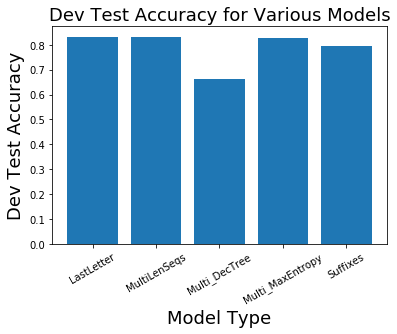

In [82]:
import matplotlib.pyplot as plt

label = [
    "LastLetter",
    "MultiLenSeqs",
    "Multi_DecTree",
    "Multi_MaxEntropy",
    "Suffixes"
]

dev_test_accuracy = [
    LastLetterOnly,  # feature based only on last letter in name
    Features2,       # a mix of 1,2,3,4 letter sequences plus letter counts
    Features2_DecisionTree, # same as Features2 but use of decision tree
    Features2_MaxEnt, # same as Features2 but uses Maximum Entropy
    Suffixes          # feature based on 1 and 2-letter suffix only
]

index = np.arange(len(dev_test_accuracy))
plt.bar(index, dev_test_accuracy)
plt.xlabel("Model Type", fontsize=18)
plt.ylabel("Dev Test Accuracy", fontsize=18)
plt.xticks(index, label, rotation=30)
plt.title("Dev Test Accuracy for Various Models", fontsize=18)
plt.show()

***Model List Description***

1. Naive Bayes, Last letter only in name
2. Naive Bayes, uses sequences of 1,2,3,4 letters in name
3. Decision Tree, uses sequences of 1,2,3,4 letters in name
4. Maximum Entropy, uses sequences of 1,2,3,4 letters in name
5. Naive Bayes, uses suffixes of length 1 and 2 only

This error analysis procedure can then be repeated, checking for patterns in the errors that are made by the newly improved classifier. Each time the error analysis procedure is repeated, we should select a different dev-test/training split, to ensure that the classifier does not start to reflect idiosyncrasies in the dev-test set.

But once we've used the dev-test set to help us develop the model, we can no longer trust that it will give us an accurate idea of how well the model would perform on new data. It is therefore important to keep the test set separate, and unused, until our model development is complete. At that point, we can use the test set to evaluate how well our model will perform on new input values.